# Random Forest

In this notebook, we explore the effect of $m$ - the size of the random feature subset used in choosing the splitting point - in the decision trees.

#### Load the California housing dataset provided in sklearn.datasets, and construct a random 70/30 train-test split. 

In [1]:
from sklearn.datasets.california_housing import fetch_california_housing
from sklearn.model_selection import train_test_split

houses = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(houses.data, houses.target, 
                                                    test_size = 0.3, random_state = 1)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.california_housing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
names = houses.feature_names
len(names)

8

#### Train a random forest of 100 decision trees using default hyperparameters.

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_reg = RandomForestRegressor(n_estimators = 100, random_state = 1)
rf_reg.fit(X_train, y_train)

pred_train = rf_reg.predict(X_train)
pred_test = rf_reg.predict(X_test)

train_MSE = mean_squared_error(pred_train, y_train)
test_MSE = mean_squared_error(pred_test, y_test)

print("Training MSE is", train_MSE)
print("Test MSE is", test_MSE)

Training MSE is 0.036767271946269345
Test MSE is 0.2608140949358087


We use mean squared error (MSE) for measuring the regression performance. The MSE for the training set is: 0.0368, while the MSE for the test set is: 0.2608.

#### Compute all the pairwise correlations between the test set predictions of the 100 trees, and report their average.  

In [7]:
import numpy as np

each_tree_pred = [tree.predict(X_test) for tree in rf_reg.estimators_]
all_corr = np.corrcoef(each_tree_pred, each_tree_pred)
pairwise_corr = np.array([])
for i in range(100):
    pairwise_corr = np.append(pairwise_corr, all_corr[i][(i+1):100])
    
print("The average of pairwise correlations is", np.mean(pairwise_corr))

The average of pairwise correlations is 0.7599679327428122


As the output shown above, the average of pairwise correlations is 0.75997.

#### Repeat (b) and (c) for 𝑚 = 1 to 𝑑 (8), and tabulate the training and test accuracies, and the average correlations for all 𝑚 values.

In [8]:
train_MSEs = []
test_MSEs = []
average_corrs = []
m_list = list(range(1, 9))

for m in m_list:
    rf_reg = RandomForestRegressor(n_estimators = 100, random_state = 1, max_features = m)
    rf_reg.fit(X_train, y_train)

    pred_train = rf_reg.predict(X_train)
    pred_test = rf_reg.predict(X_test)

    train_MSEs.append(mean_squared_error(pred_train, y_train))
    test_MSEs.append(mean_squared_error(pred_test, y_test))
    
    each_tree_pred = [tree.predict(X_test) for tree in rf_reg.estimators_]
    all_corr = np.corrcoef(each_tree_pred, each_tree_pred)
    
    pairwise_corr = np.array([])
    for i in range(100):
        pairwise_corr = np.append(pairwise_corr, all_corr[i][(i+1):100])
    average_corrs.append(np.mean(pairwise_corr))


In [9]:
import pandas as pd

tabulate_data = {'m': m_list, 'Training MSE': train_MSEs, 'Test MSE': test_MSEs, 
                 'Average Correlations': average_corrs}
df = pd.DataFrame(tabulate_data, columns = tabulate_data.keys())
print(df)

   m  Training MSE  Test MSE  Average Correlations
0  1      0.040679  0.284091              0.601266
1  2      0.034894  0.245656              0.703066
2  3      0.033898  0.241642              0.736417
3  4      0.034678  0.244923              0.746162
4  5      0.035879  0.253168              0.749856
5  6      0.036054  0.253776              0.755807
6  7      0.036612  0.259036              0.754222
7  8      0.036767  0.260814              0.759968


In addition, plot the training and test accuracies against 𝑚 in a single figure, and plot the average correlation against 𝑚 in another figure.

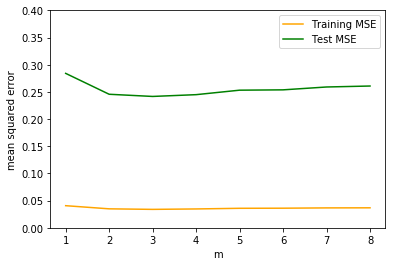

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(m_list, train_MSEs, color = 'orange', label = 'Training MSE')
plt.plot(m_list, test_MSEs, color = 'green', label = 'Test MSE')
plt.ylim([0, 0.4])
plt.xlabel("m")
plt.ylabel("mean squared error")
plt.legend(loc = 1)
plt.show()

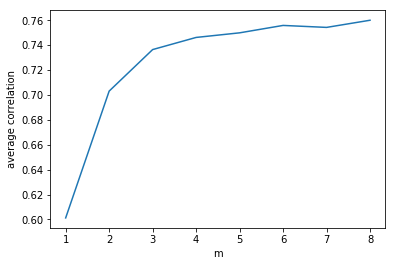

In [11]:
plt.plot(m_list, average_corrs)
plt.xlabel("m")
plt.ylabel("average correlation")
plt.show()

#### The average correlation increases as the value of m increases.

In [24]:
# have a look at the feature_importances_
np.sort(rf_reg.feature_importances_)[::-1]

array([0.52221483, 0.14033067, 0.09136843, 0.08901316, 0.05209914,
       0.04281605, 0.03121226, 0.03094546])

As the maximum number of features (m) increases, we generally use more features for model building. It is no doubt that when the number of features used to train a decision tree is low, with more features in the dataset, the regression performance would be better, and thus, we can predict the test set with a higher accuracy. So the predicted results would be closer to the actual values and hence the average correlation would increase before m equals to 6.  
  
From the output above, the feature importances are just slightly different except the one with 0.5222 and the one with 0.1403, that is the reason why the average correlation increases rapidly at first and becomes steadier after m = 3.  